## Dataset Description

### Etiquetas

El conjunto de datos se proporciona en formato CSV (train.csv) y contiene información sobre 732 pacientes con diferentes grados de enfermedad (1-4) o ausencia de la misma (0). Este dato puede obtenerse de la columna 'label'.

### Características

Además, el conjunto de datos está compuesto por 13 características adicionales que describen las condiciones de salud de cada uno de los pacientes. Estas características se describen a continuación:

1. **age**: Edad del paciente.
2. **sex**: Sexo del paciente.
3. **cp**: Tipo de dolor de pecho:
   - 1: Angina típica
   - 2: Angina atípica
   - 3: Dolor no-anginoso
   - 4: Asintomático
4. **trestbps**: Presión arterial en reposo (en mm Hg al ingreso en el hospital).
5. **chol**: Colesterol sérico en mg/dl.
6. **fbs**: Dolor provocado por el esfuerzo (1 = sí; 0 = no).
7. **restecg**: Resultados electrocardiográficos en reposo:
   - 0: Normal
   - 1: Presenta anormalidad de la onda ST-T
   - 2: Presenta probable o definida hipertrofía ventricular izquierda
8. **thalach**: Frecuencia cardiaca en reposo.
9. **exang**: Angina inducida por el ejercicio (1 = sí; 0 = no).
10. **oldpeak**: Depresión del ST inducida por el ejercicio en relación con el reposo.
11. **slope**: La pendiente del segmento ST en ejercicio máximo:
    - 1: Pendiente ascendente
    - 2: Plano
    - 3: Pendiente descendente
12. **ca**: Número de vasos mayores (0-3) coloreados por fluoroscopía.
13. **thal**:
    - 3: Normal
    - 6: Defecto fijo
    - 7: Defecto reversible


## 1- Analisis Exploratorio

### A - Análisis descriptivo del dataset de entrenamiento (TRAIN)

In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46.0,1.0,3.0,120.0,230.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0
728,62.0,1.0,3.0,?,204,0,1.0,?,?,?,?,?,?,1
729,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
730,68.0,1.0,3.0,150,195,1,0.0,132,0,0,?,?,6,1


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


In [3]:
train.describe()

,age,sex,cp,restecg,label
count,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,0.789617,3.250000,0.602459,1.132514
std,9.306868,0.407859,0.923363,0.802966,1.257615
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,0.000000,1.000000
75%,60.000000,1.000000,4.000000,1.000000,2.000000
max,76.000000,1.000000,4.000000,2.000000,4.000000


In [4]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = train[train == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por variable en TRAIN:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(train)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por variable en TRAIN:")
print(missing_percentage)

Valores faltantes por variable en TRAIN:
ca          249
thal        169
slope        95
fbs          58
oldpeak      49
trestbps     47
thalach      44
exang        44
chol          5
age           0
sex           0
cp            0
restecg       0
label         0
dtype: int64

Porcentaje de valores faltantes por variable en TRAIN:
ca          34.016393
thal        23.087432
slope       12.978142
fbs          7.923497
oldpeak      6.693989
trestbps     6.420765
thalach      6.010929
exang        6.010929
chol         0.683060
age          0.000000
sex          0.000000
cp           0.000000
restecg      0.000000
label        0.000000
dtype: float64


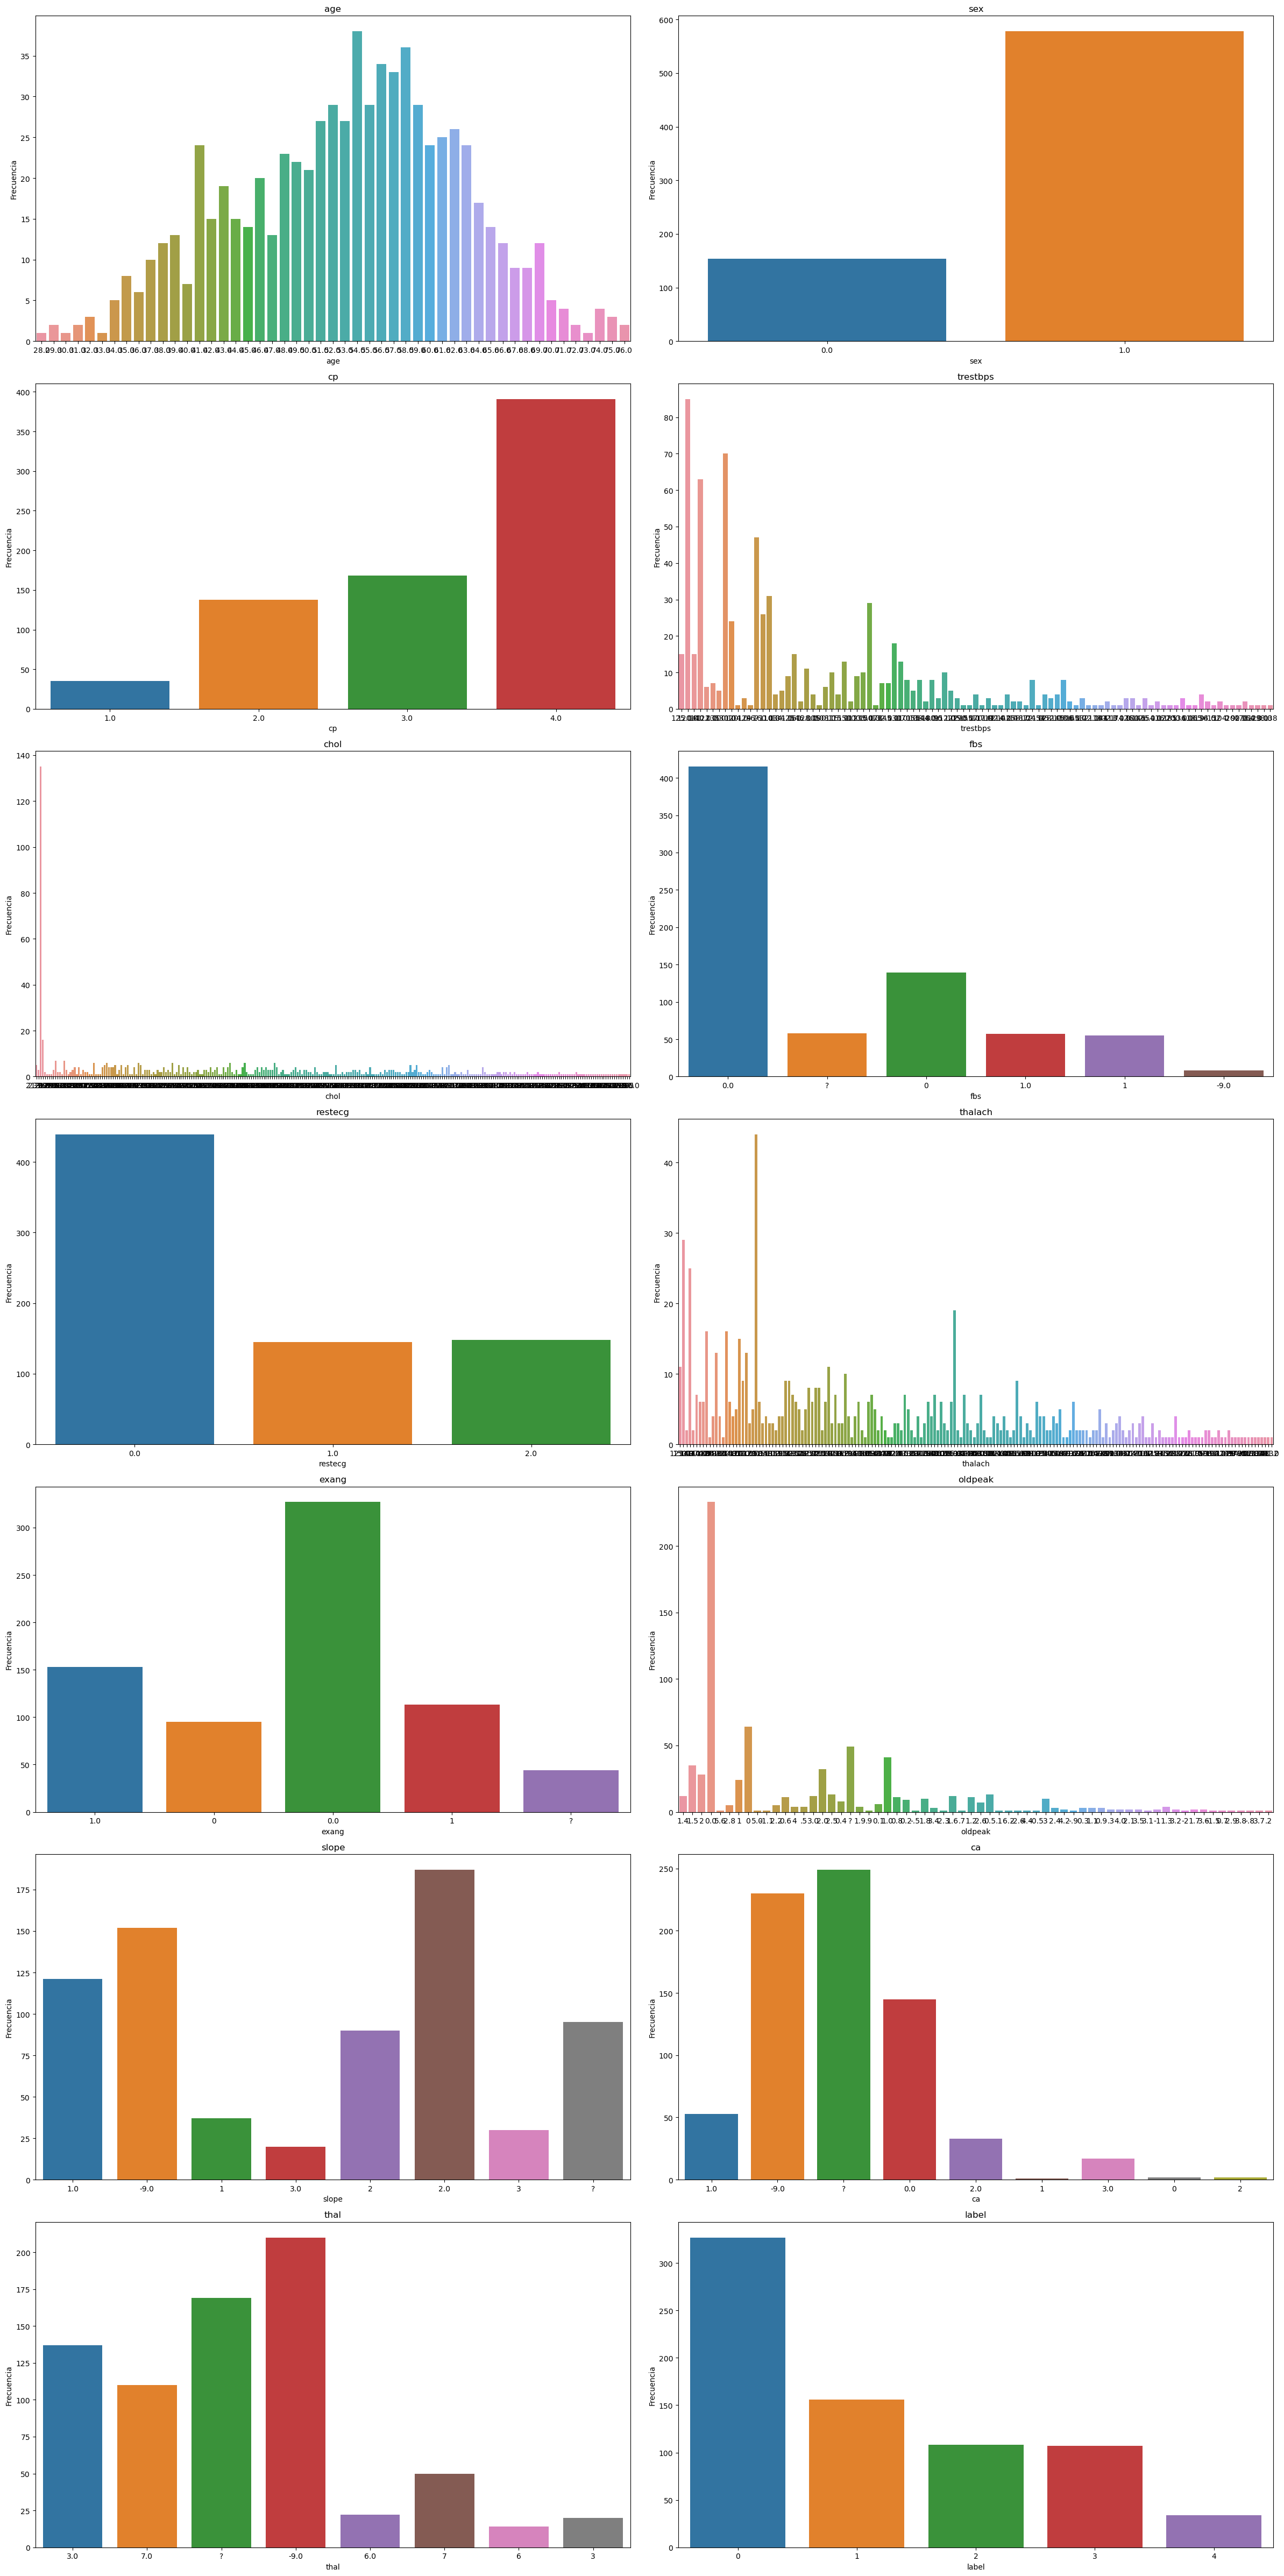

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=train, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### B - Análisis descriptivo del dataset de testeo (TEST)

In [6]:
test = pd.read_csv("test.csv")
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,4.0,156,173,0,2,119,1,3,3,?,?
1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,-9.0,-9.0,-9.0
2,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0
3,62.0,1.0,4.0,115,0,?,0,128,1,2.5,3,?,?
4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0
180,55.0,1.0,2.0,110,214,1,1,180,0,?,?,?,?
181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0
182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    float64
 1   sex       184 non-null    float64
 2   cp        184 non-null    float64
 3   trestbps  184 non-null    object 
 4   chol      184 non-null    object 
 5   fbs       184 non-null    object 
 6   restecg   184 non-null    object 
 7   thalach   184 non-null    object 
 8   exang     184 non-null    object 
 9   oldpeak   184 non-null    object 
 10  slope     184 non-null    object 
 11  ca        184 non-null    object 
 12  thal      184 non-null    object 
dtypes: float64(3), object(10)
memory usage: 18.8+ KB


In [8]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = test[test == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por variable en TEST:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(test)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por variable en TEST:")
print(missing_percentage)

Valores faltantes por variable en TEST:
ca          69
thal        49
slope       24
fbs         23
oldpeak     13
trestbps    11
thalach     10
exang       10
chol         2
restecg      1
age          0
sex          0
cp           0
dtype: int64

Porcentaje de valores faltantes por variable en TEST:
ca          37.500000
thal        26.630435
slope       13.043478
fbs         12.500000
oldpeak      7.065217
trestbps     5.978261
thalach      5.434783
exang        5.434783
chol         1.086957
restecg      0.543478
age          0.000000
sex          0.000000
cp           0.000000
dtype: float64


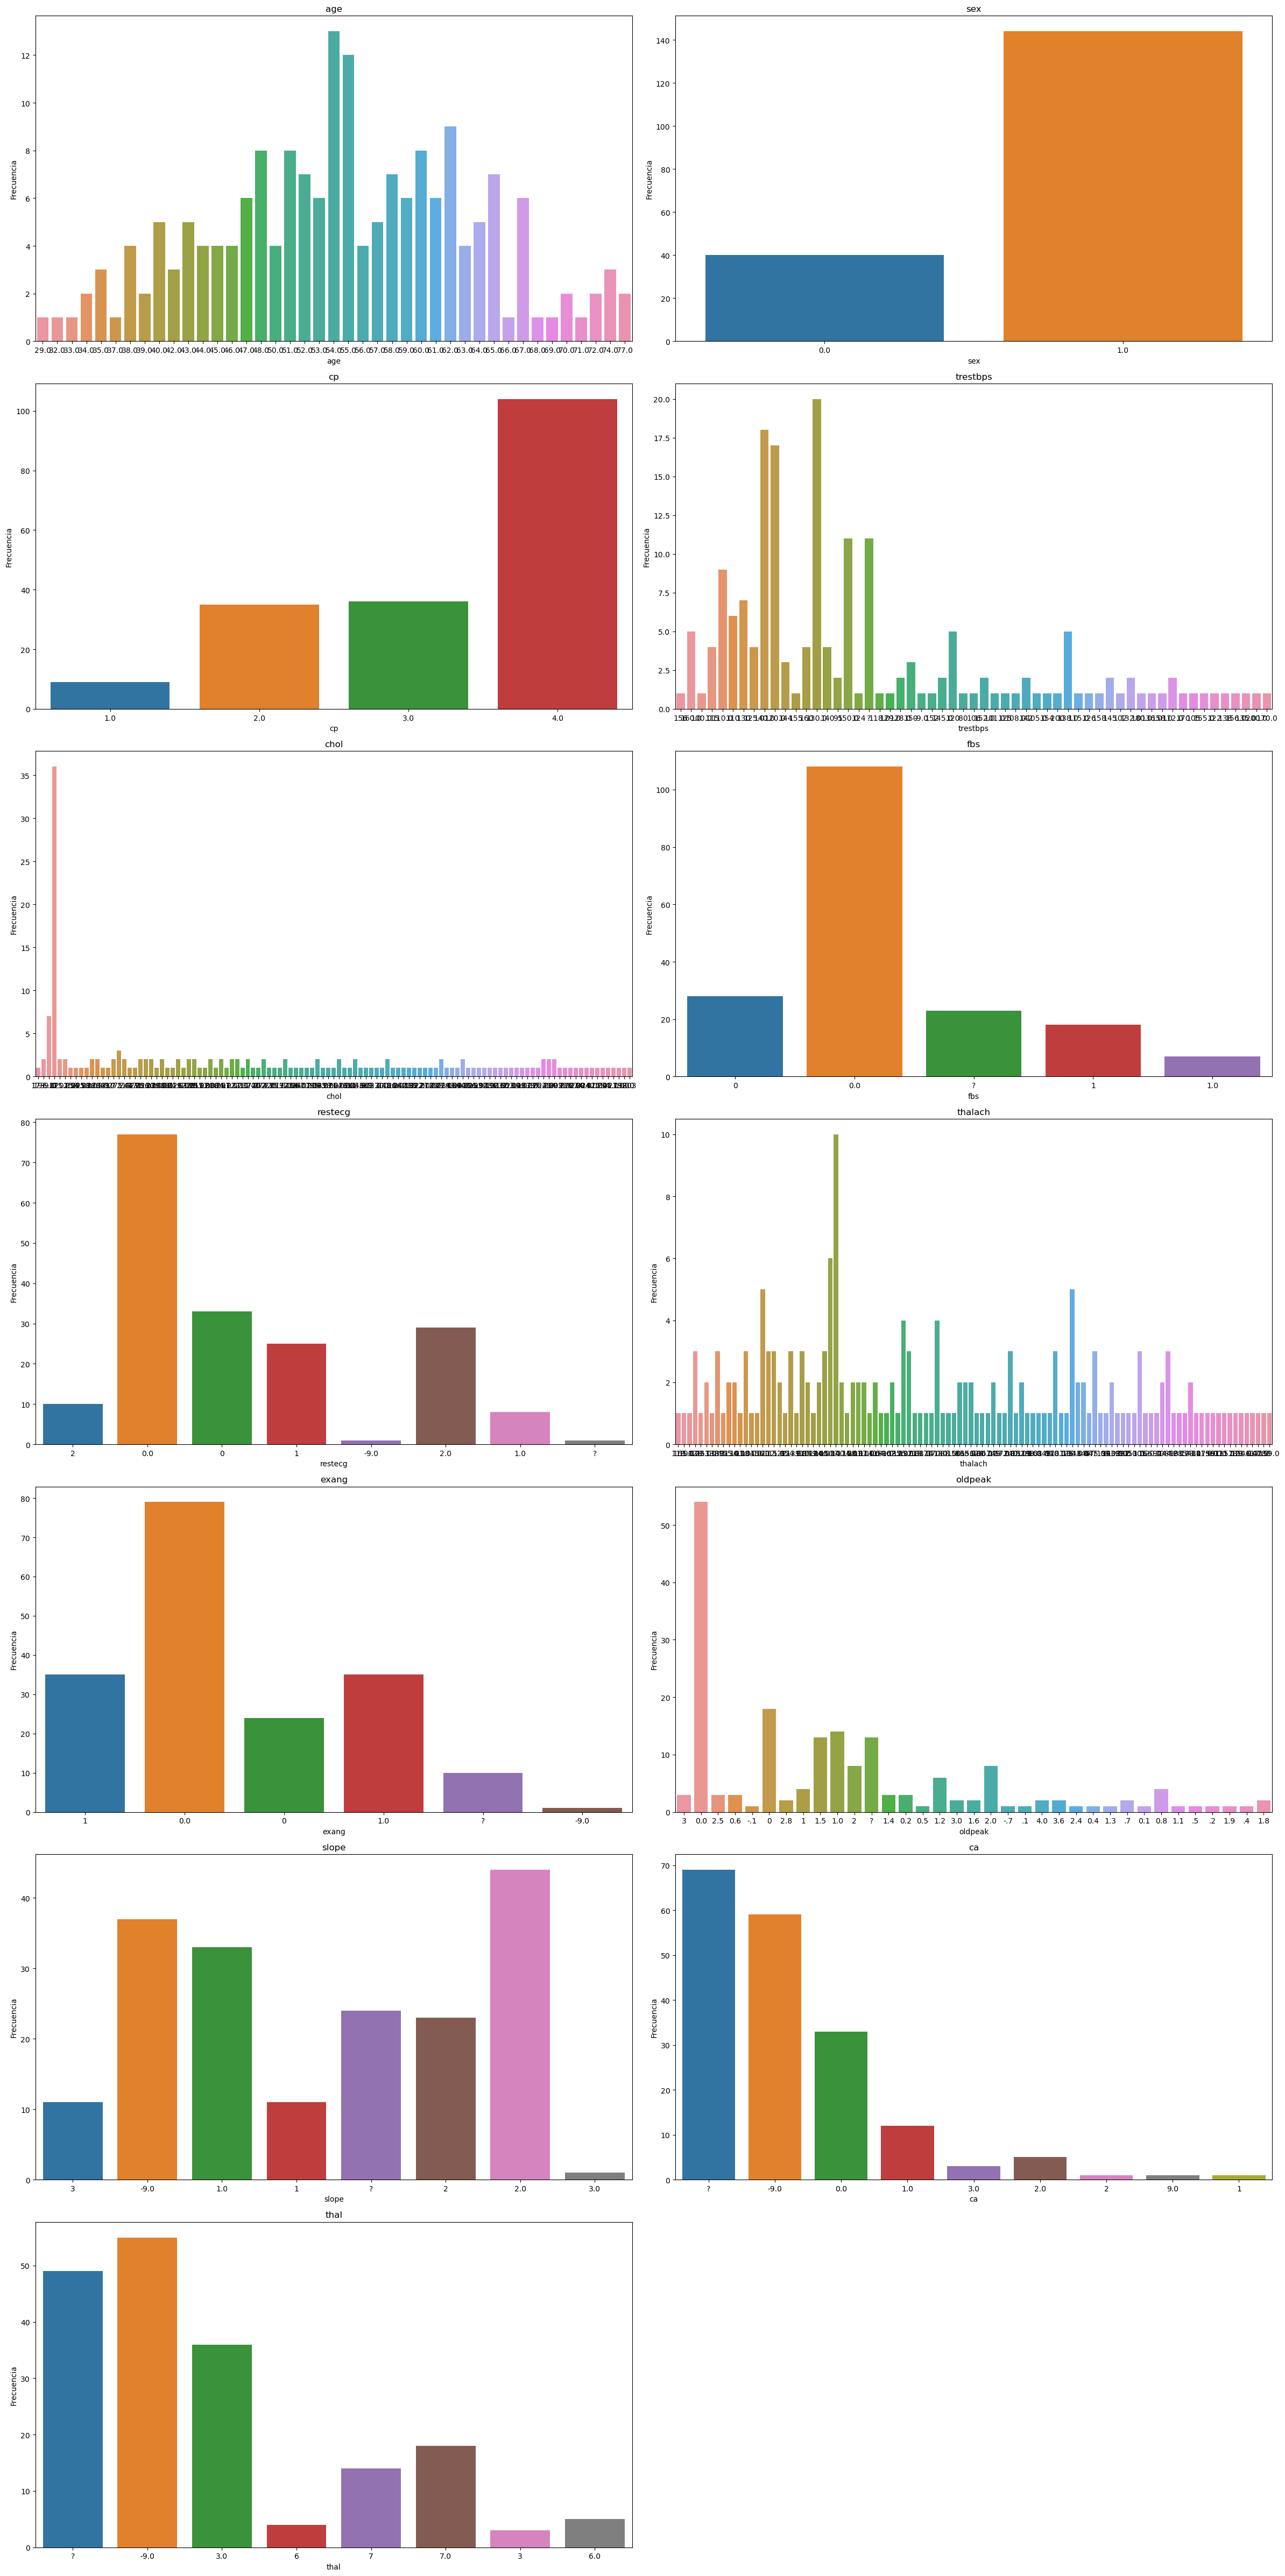

In [9]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=test, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## 2 -Tratamiento del Dataset

### A- Transformaciones dataset TRAIN

#### Definicion de datatypes

In [10]:
train = pd.read_excel("train_2.xlsx")
train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125,213,0,2,125,1,1.4,1,1,3,0
1,54,1,3,120,237,0,0,150,1,1.5,-9,-9,7,2
2,63,1,4,140,0,?,2,149,0,2,1,?,?,2
3,52,0,2,140,-9,0,0,140,0,0,-9,-9,-9,0
4,55,1,4,140,217,0,0,111,1,5.6,3,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,1,1,152,298,1,0,178,0,1.2,2,0,7,0
685,46,1,3,120,230,0,0,150,0,0,-9,-9,-9,0
686,43,0,3,122,213,0,0,165,0,0.2,2,0,3,0
687,68,1,3,150,195,1,0,132,0,0,?,?,6,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       689 non-null    int64 
 1   sex       689 non-null    int64 
 2   cp        689 non-null    int64 
 3   trestbps  689 non-null    object
 4   chol      689 non-null    object
 5   fbs       689 non-null    object
 6   restecg   689 non-null    int64 
 7   thalach   689 non-null    object
 8   exang     689 non-null    object
 9   oldpeak   689 non-null    object
 10  slope     689 non-null    object
 11  ca        689 non-null    object
 12  thal      689 non-null    object
 13  label     689 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 75.5+ KB


In [12]:
import numpy as np
import pandas as pd

# Reemplazar '?' con NaN 
train = train.replace('?', np.nan)

# Convertir variables discretas a numericas
int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
train[int_cols] = train[int_cols].apply(pd.to_numeric, errors='coerce')

# Convertir variables a continuas a numericas
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
train[float_cols] = train[float_cols].apply(pd.to_numeric, errors='coerce')

# Iterar sobre las columnas numéricas y reemplazar los valores negativos por NaN, y -9 por NaN solo en 'oldpeak'
for col in int_cols + float_cols:
    if col == 'oldpeak':
        train[col] = train[col].replace(-9, np.nan)
    else:
        train[col] = train[col].apply(lambda x: np.nan if pd.isnull(x) or x < 0 else x)

# Convertir las columnas discretas a tipo entero
train[int_cols] = train[int_cols].astype('Int64')

# Verificar la información del DataFrame
#train['oldpeak'].describe()
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.4,1,1,3,0
1,54,1,3,120.0,237.0,0,0,150.0,1,1.5,<NA>,<NA>,7,2
2,63,1,4,140.0,0.0,<NA>,2,149.0,0,2.0,1,<NA>,<NA>,2
3,52,0,2,140.0,NaN,0,0,140.0,0,0.0,<NA>,<NA>,<NA>,0
4,55,1,4,140.0,217.0,0,0,111.0,1,5.6,3,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,1,1,152.0,298.0,1,0,178.0,0,1.2,2,0,7,0
685,46,1,3,120.0,230.0,0,0,150.0,0,0.0,<NA>,<NA>,<NA>,0
686,43,0,3,122.0,213.0,0,0,165.0,0,0.2,2,0,3,0
687,68,1,3,150.0,195.0,1,0,132.0,0,0.0,<NA>,<NA>,6,1


In [13]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
count,689.0,689.0,689.0,685.000000,670.000000,623.0,689.0,688.000000,688.0,683.000000,485.0,253.0,353.0,689.0
mean,53.007257,0.777939,3.256894,131.975182,199.782090,0.152488,0.592163,138.132267,0.386628,0.881259,1.77732,0.6917,5.11898,1.11611
std,9.274791,0.415934,0.924104,19.203305,111.282107,0.359782,0.812688,25.963443,0.487331,1.112960,0.616493,0.946909,1.921028,1.252156
min,28.0,0.0,1.0,0.000000,0.000000,0.0,0.0,60.000000,0.0,-2.600000,1.0,0.0,3.0,0.0
25%,46.0,1.0,3.0,120.000000,177.000000,0.0,0.0,120.000000,0.0,0.000000,1.0,0.0,3.0,0.0
50%,54.0,1.0,4.0,130.000000,223.000000,0.0,0.0,140.000000,0.0,0.500000,2.0,0.0,6.0,1.0
75%,59.0,1.0,4.0,140.000000,267.000000,0.0,1.0,158.250000,1.0,1.550000,2.0,1.0,7.0,2.0
max,76.0,1.0,4.0,200.000000,603.000000,1.0,2.0,202.000000,1.0,6.200000,3.0,3.0,7.0,4.0


#### Reemplazo de valores missing

##### **Opcion 1** - Reemplazo de ***valores faltantes NaN*** por la mediana en las variables float y por la moda en las variables int 


In [14]:
'''''
# Copia df
train_copy_a =  train.copy()


# Iterar sobre las columnas int y reemplazar los NaN con el valor más frecuente
for col in int_cols:
    train_copy_a[col].fillna(train_copy_a[col].mode()[0], inplace=True)


# Iterar sobre las columnas float y reemplazar los NaN con la media
for col in float_cols:
    train_copy_a[col].fillna(train_copy_a[col].median(), inplace=True)
    

'''''

"''\n# Copia df\ntrain_copy_a =  train.copy()\n\n\n# Iterar sobre las columnas int y reemplazar los NaN con el valor más frecuente\nfor col in int_cols:\n    train_copy_a[col].fillna(train_copy_a[col].mode()[0], inplace=True)\n\n\n# Iterar sobre las columnas float y reemplazar los NaN con la media\nfor col in float_cols:\n    train_copy_a[col].fillna(train_copy_a[col].median(), inplace=True)\n    \n\n"

##### **Opcion 2** - Analisis de cada variable imputando valores faltantes en base a la mediana de combinaciones con edad y sexo.

In [15]:
#Copia del df
train_copy_b =  train.copy()


int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

print(train_copy_b.isnull().sum())

age           0
sex           0
cp            0
trestbps      4
chol         19
fbs          66
restecg       0
thalach       1
exang         1
oldpeak       6
slope       204
ca          436
thal        336
label         0
dtype: int64


In [16]:
from sklearn.impute import KNNImputer

#Copia del df 
train_copy_b =  train.copy()


int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']


train_copy_b['chol'].replace(0, np.nan, inplace=True)

# Step 1: Calculate the average 'chol' for each combination of age and gender
average_chol = train_copy_b.groupby(['age', 'sex'])['chol'].median()


# Step 2: Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_chol(row):
    if pd.isnull(row['chol']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_chol:
            return average_chol[(age, sex)]
    return row['chol']

train_copy_b['chol'] = train_copy_b.apply(fill_missing_chol, axis=1)


#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['chol'] .isnull().sum())
print(train_copy_b['chol'].mean())

train_copy_b['chol'] 
average_chol

2
245.26491994177584


age  sex
28   1      132.0
29   1      223.5
30   0      237.0
31   0      219.0
     1      270.0
            ...  
73   0        NaN
74   1      258.0
75   1      225.0
76   0      197.0
     1        NaN
Name: chol, Length: 87, dtype: float64

In [17]:
train_copy_b['thalach'].replace(0, np.nan, inplace=True)
# Step 1: Calculate the average 'chol' for each combination of age and gender
average_thalach = train_copy_b.groupby(['age', 'sex'])['thalach'].median()
# Step 2: Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_thalach(row):
    if pd.isnull(row['thalach']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_thalach:
            return average_chol[(age, sex)]
    return row['thalach']

train_copy_b['thalach'] = train_copy_b.apply(fill_missing_thalach, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['thalach'] .isnull().sum())
print(train_copy_b['thalach'].mean())


train_copy_b['thalach']


0
138.27140783744557


0      125.0
1      150.0
2      149.0
3      140.0
4      111.0
       ...  
684    178.0
685    150.0
686    165.0
687    132.0
688    163.0
Name: thalach, Length: 689, dtype: float64

In [18]:
train_copy_b['trestbps'].replace(0, np.nan, inplace=True)
# Step 1: Calculate the average 'chol' for each combination of age and gender
average_trestbps = train_copy_b.groupby(['age', 'sex'])['trestbps'].median()
# Step 2: Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_trestbps(row):
    if pd.isnull(row['trestbps']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_trestbps:
            return average_chol[(age, sex)]
    return row['trestbps']

train_copy_b['trestbps'] = train_copy_b.apply(fill_missing_thalach, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['trestbps'] .isnull().sum())
print(train_copy_b['trestbps'].mean())

train_copy_b['trestbps']


0
138.27140783744557


0      125.0
1      150.0
2      149.0
3      140.0
4      111.0
       ...  
684    178.0
685    150.0
686    165.0
687    132.0
688    163.0
Name: trestbps, Length: 689, dtype: float64

In [19]:
# Step 1: Group by 'cp' and 'restecg' and get the mode of 'exang'
mode_exang_by_cp_restecg = train_copy_b.groupby(['cp', 'restecg'])['exang'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 2: Fill in missing values in 'exang' based on the mode for the corresponding 'cp' and 'restecg' combination
def fill_missing_exang(row):
    if pd.isnull(row['exang']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_exang_by_cp_restecg:
            return mode_exang_by_cp_restecg[(cp, restecg)]
    return row['exang']

train_copy_b['exang'] = train_copy_b.apply(fill_missing_exang, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['exang'] .isnull().sum())
print(train_copy_b['exang'].median())

train_copy_b['exang']

0
0.0


0      1.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
684    0.0
685    0.0
686    0.0
687    0.0
688    0.0
Name: exang, Length: 689, dtype: float64

In [20]:
# Step 1: Group by 'cp' and 'age' and get the mode of 'fbs'
mode_fbs_by_cp_age = train_copy_b.groupby(['cp','exang'])['fbs'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 2: Fill in missing values in 'fbs' based on the mode for the corresponding 'cp' and 'age' combination
def fill_missing_fbs(row):
    if pd.isnull(row['fbs']):
        cp = row['cp']
        exang = row['exang']
        if (cp, exang) in mode_fbs_by_cp_age:
            return mode_fbs_by_cp_age[(cp, exang)]
    return row['fbs']

train_copy_b['fbs'] = train_copy_b.apply(fill_missing_fbs, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['fbs'] .isnull().sum())
print(train_copy_b['fbs'].median())


train_copy_b['fbs']


0
0.0


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
684    1.0
685    0.0
686    0.0
687    1.0
688    0.0
Name: fbs, Length: 689, dtype: float64

In [21]:
# Step 1: Calculate the average 'oldpeak' for each combination of age and gender
average_oldpeak = train_copy_b.groupby(['age', 'sex'])['oldpeak'].median()

# Step 2: Fill in the missing values in the 'oldpeak' column with the corresponding average value based on age and gender
def fill_missing_oldpeak(row):
    if pd.isnull(row['oldpeak']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_oldpeak:
            return average_oldpeak[(age, sex)]
    return row['oldpeak']

train_copy_b['oldpeak'] = train_copy_b.apply(fill_missing_oldpeak, axis=1)

#print(train_copy_b[train_copy_b['chol'].isnull()])
print(train_copy_b['oldpeak'] .isnull().sum())
print(train_copy_b['oldpeak'].median())

train_copy_b['oldpeak']

0
0.5


0      1.4
1      1.5
2      2.0
3      0.0
4      5.6
      ... 
684    1.2
685    0.0
686    0.2
687    0.0
688    0.0
Name: oldpeak, Length: 689, dtype: float64

In [22]:
# Step 1: Group by 'fbs' and 'restecg' and get the mode of 'slope'
mode_slope_by_fbs_restecg = train_copy_b.groupby(['fbs', 'restecg'])['slope'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Step 2: Fill in missing values in 'slope' based on the mode for the corresponding 'fbs' and 'restecg' combination
def fill_missing_slope(row):
    if pd.isnull(row['slope']):
        fbs = row['fbs']
        restecg = row['restecg']
        if (fbs, restecg) in mode_slope_by_fbs_restecg:
            return mode_slope_by_fbs_restecg[(fbs, restecg)]
    return row['slope']

train_copy_b['slope'] = train_copy_b.apply(fill_missing_slope, axis=1)

print(train_copy_b['slope'] .isnull().sum())
print(train_copy_b['slope'].median())


train_copy_b['slope']
mode_slope_by_fbs_restecg

0
2.0


fbs  restecg
0.0  0          2
     1          2
     2          2
1.0  0          2
     1          2
     2          1
Name: slope, dtype: int64

In [23]:
# Step 1: Calculate the mode 'ca' for each combination of cp and restecg
mode_ca_by_cp_restecg = train_copy_b.groupby(['cp', 'restecg'])['ca'].median()

# Step 2: Fill in the missing values in the 'ca' column with the corresponding mode value based on cp and restecg
def fill_missing_ca(row):
    if pd.isnull(row['ca']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_ca_by_cp_restecg:
            return mode_ca_by_cp_restecg[(cp, restecg)]
    return row['ca']

train_copy_b['ca'] = train_copy_b.apply(fill_missing_ca, axis=1)

print(train_copy_b['ca'] .isnull().sum())
print(train_copy_b['ca'].median())

train_copy_b['ca']


24
1.0


0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
684    0.0
685    0.0
686    0.0
687    0.0
688    0.0
Name: ca, Length: 689, dtype: object

In [24]:
# Step 1: Calculate the mode 'thal' for each combination of 'edad' y 'restecg'
mode_thal_by_age_restecg = train_copy_b.groupby(['cp', 'restecg'])['thal'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Step 2: Fill in the missing values in the 'thal' column with the corresponding mode value based on 'age' y 'restecg'
def fill_missing_thal(row):
    if pd.isnull(row['thal']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_thal_by_age_restecg:
            return mode_thal_by_age_restecg[(cp, restecg)]
    return row['thal']

train_copy_b['thal'] = train_copy_b.apply(fill_missing_thal, axis=1)

print(train_copy_b['thal'] .isnull().sum())
print(train_copy_b['thal'].median())

train_copy_b['thal']


19
7.0


0      3.0
1      7.0
2      7.0
3      3.0
4      7.0
      ... 
684    7.0
685    3.0
686    3.0
687    6.0
688    3.0
Name: thal, Length: 689, dtype: float64

In [25]:
print(train_copy_b.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         2
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          24
thal        19
label        0
dtype: int64


##### **Opcion 3** - KNN (K-Nearest Neighbors): imputa los valores faltantes utilizando los valores de las observaciones más similares en función de otras variables. Calcula los vecinos más cercanos y usar sus valores para imputar los valores faltantes. Se aplica solo a variables float

In [26]:

train_copy_knn =  train_copy_b.copy()

# Imputar valores faltantes para variables float
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(train_copy_knn[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)

# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = train_copy_knn[int_cols].fillna(train_copy_knn.mode().iloc[0])

# Combinar las variables float y int imputadas
train_copy_knn = pd.concat([numeric_imputed_df, categorical_imputed_df], axis=1)

# Verificar si hay valores faltantes después de la imputacion
# Check for missing values
train_copy_knn = train_copy_knn[train.columns]
train_copy_knn


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54,1,3,150.0,237.0,0.0,0,150.0,1.0,1.5,2.0,0.0,7.0,2
2,63,1,4,149.0,254.0,0.0,2,149.0,0.0,2.0,1.0,1.0,7.0,2
3,52,0,2,140.0,203.0,0.0,0,140.0,0.0,0.0,2.0,0.0,3.0,0
4,55,1,4,111.0,217.0,0.0,0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,1,1,178.0,298.0,1.0,0,178.0,0.0,1.2,2.0,0.0,7.0,0
685,46,1,3,150.0,230.0,0.0,0,150.0,0.0,0.0,2.0,0.0,3.0,0
686,43,0,3,165.0,213.0,0.0,0,165.0,0.0,0.2,2.0,0.0,3.0,0
687,68,1,3,132.0,195.0,1.0,0,132.0,0.0,0.0,2.0,0.0,6.0,1


In [27]:
# Check if there are any missing values left
print(train_copy_knn.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64


##### **Opcion 4** Reemplazo de valores faltantes por la mediana o moda, y eliminacion de outliers 

In [28]:
'''''
from sklearn.impute import KNNImputer

# Copia del DataFrame
train_copy_c = train.copy()

#complete_cols = ['age', 'label', 'sex', 'cp', 'restecg','thalach','exang']

# Iterar sobre las columnas int y reemplazar los NaN con el valor más frecuente
for col in int_cols:
    train_copy_c[col].fillna(train_copy_c[col].mode()[0], inplace=True)


# Iterar sobre las columnas float y reemplazar los NaN con la media
for col in float_cols:
    train_copy_c[col].fillna(train_copy_c[col].median(), inplace=True)

#train_copy_c = train_copy_c[complete_cols]

# Calcula el rango intercuartílico (IQR) para cada variable continua
Q1 = train_copy_c[float_cols].quantile(0.25)
Q3 = train_copy_c[float_cols].quantile(0.75)
IQR = Q3 - Q1

# Define un umbral para identificar valores atípicos
threshold = 1.5

# Identifica valores atípicos para cada variable continua
outliers = (train_copy_c[float_cols] < (Q1 - threshold * IQR)) | (train_copy_c[float_cols] > (Q3 + threshold * IQR))

# Elimina filas que contengan valores atípicos en al menos una variable continua
train_copy_c_no_outliers = train_copy_c[~outliers.any(axis=1)]

# Muestra el nuevo conjunto de datos sin valores atípicos
train_copy_c_no_outliers
'''''

"''\nfrom sklearn.impute import KNNImputer\n\n# Copia del DataFrame\ntrain_copy_c = train.copy()\n\n#complete_cols = ['age', 'label', 'sex', 'cp', 'restecg','thalach','exang']\n\n# Iterar sobre las columnas int y reemplazar los NaN con el valor más frecuente\nfor col in int_cols:\n    train_copy_c[col].fillna(train_copy_c[col].mode()[0], inplace=True)\n\n\n# Iterar sobre las columnas float y reemplazar los NaN con la media\nfor col in float_cols:\n    train_copy_c[col].fillna(train_copy_c[col].median(), inplace=True)\n\n#train_copy_c = train_copy_c[complete_cols]\n\n# Calcula el rango intercuartílico (IQR) para cada variable continua\nQ1 = train_copy_c[float_cols].quantile(0.25)\nQ3 = train_copy_c[float_cols].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define un umbral para identificar valores atípicos\nthreshold = 1.5\n\n# Identifica valores atípicos para cada variable continua\noutliers = (train_copy_c[float_cols] < (Q1 - threshold * IQR)) | (train_copy_c[float_cols] > (Q3 + threshold * IQR))

##### **Opcion 5** eliminacion de valores atipicos y Imputacion con KNN para variables float y moda para variables int

In [29]:
'''''
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

#Copia del df
train_copy_d =  train.copy()

# Reemplazar valores cero con NaN
train_copy_d[float_cols] = train_copy_d[float_cols].replace(0, float('nan'))

# Imputar valores faltantes utilizando KNNImputer
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(train_copy_d[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)


# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = train_copy_d[int_cols].fillna(train_copy_d.mode().iloc[0])

# Combinar las variables float y int imputadas
train_copy_d = pd.concat([categorical_imputed_df, numeric_imputed_df], axis=1)

# Calcula el rango intercuartílico (IQR) para cada variable continua
Q1 = train_copy_d[float_cols].quantile(0.25)
Q3 = train_copy_d[float_cols].quantile(0.75)
IQR = Q3 - Q1

# Define un umbral para identificar valores atípicos
threshold = 1.5

# Identifica valores atípicos para cada variable continua
outliers = (train_copy_d[float_cols] < (Q1 - threshold * IQR)) | (train_copy_d[float_cols] > (Q3 + threshold * IQR))

# Elimina filas que contengan valores atípicos en al menos una variable continua
train_copy_d_no_outliers = train_copy_d[~outliers.any(axis=1)]

# Muestra el nuevo conjunto de datos sin valores atípicos
train_copy_d_no_outliers = train_copy_d_no_outliers[train.columns]
train_copy_d_no_outliers
'''''

"''\nfrom sklearn.impute import KNNImputer\nfrom sklearn.preprocessing import OneHotEncoder\n\n#Copia del df\ntrain_copy_d =  train.copy()\n\n# Reemplazar valores cero con NaN\ntrain_copy_d[float_cols] = train_copy_d[float_cols].replace(0, float('nan'))\n\n# Imputar valores faltantes utilizando KNNImputer\nnumeric_imputer = KNNImputer()\nnumeric_imputed_data = numeric_imputer.fit_transform(train_copy_d[float_cols])\nnumeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)\n\n\n# Imputar valores faltantes con la moda para variables int\ncategorical_imputed_df = train_copy_d[int_cols].fillna(train_copy_d.mode().iloc[0])\n\n# Combinar las variables float y int imputadas\ntrain_copy_d = pd.concat([categorical_imputed_df, numeric_imputed_df], axis=1)\n\n# Calcula el rango intercuartílico (IQR) para cada variable continua\nQ1 = train_copy_d[float_cols].quantile(0.25)\nQ3 = train_copy_d[float_cols].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define un umbral para identificar valores

##### **Opcion 6** Normalizacion de variables continuas a partir de parametros normales, e imputacion de moda para categoricas.

In [30]:
'''''
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

#Copia del df
train_copy_e =  train.copy()

float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']

train_float = train_copy_e[float_cols]
train_categorical = train_copy_e[int_cols].fillna(train_copy_e.mode().iloc[0])

def imputar_valores_anormales(df, rangos_normales):

    # Inicializar un DataFrame para almacenar los valores imputados
    df_imputado = df.copy()
    
    # Iterar sobre cada columna y su rango normal correspondiente
    for col, rango_normal in rangos_normales.items():
        min_val, max_val = rango_normal
        
        # Imputar los valores dentro o fuera del rango normal
        df_imputado[col] = df[col].apply(lambda x: 0 if min_val <= x <= max_val else 1)
    
    return df_imputado


# Ejemplo de uso

rangos_normales = {
    'chol': (0, 250),    # Colesterol total: 125-200 mg/dL
    'trestbps': (0, 120), # Presión arterial en reposo (sistólica): < 120 mmHg
    'thalach': (0, 100),  # Frecuencia cardíaca máxima: 60-100 latidos por minuto
    'oldpeak': (0, 1.7)    # Depresión del segmento ST inducida por el ejercicio: < 1.0 mm
}  

# Aplicar funcion
train_float_imputado = imputar_valores_anormales(train_float, rangos_normales)



# Combinar las variables float y int imputadas
train_copy_e = pd.concat([train_categorical, train_float_imputado], axis=1)

train_copy_e = train_copy_e[train.columns]

train_copy_e
'''''

"''\nfrom sklearn.impute import KNNImputer\nfrom sklearn.preprocessing import OneHotEncoder\n\n#Copia del df\ntrain_copy_e =  train.copy()\n\nfloat_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']\nint_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']\n\ntrain_float = train_copy_e[float_cols]\ntrain_categorical = train_copy_e[int_cols].fillna(train_copy_e.mode().iloc[0])\n\ndef imputar_valores_anormales(df, rangos_normales):\n\n    # Inicializar un DataFrame para almacenar los valores imputados\n    df_imputado = df.copy()\n    \n    # Iterar sobre cada columna y su rango normal correspondiente\n    for col, rango_normal in rangos_normales.items():\n        min_val, max_val = rango_normal\n        \n        # Imputar los valores dentro o fuera del rango normal\n        df_imputado[col] = df[col].apply(lambda x: 0 if min_val <= x <= max_val else 1)\n    \n    return df_imputado\n\n\n# Ejemplo de uso\n\nrangos_normales = {\n    'chol': (0, 250),    #

##### **Opcion 7** Normalizacion de variables con moda y knn, pero convirtiendo luego categoricas ordinales a dummy.

In [31]:
train_copy_knn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54,1,3,150.0,237.0,0.0,0,150.0,1.0,1.5,2.0,0.0,7.0,2
2,63,1,4,149.0,254.0,0.0,2,149.0,0.0,2.0,1.0,1.0,7.0,2
3,52,0,2,140.0,203.0,0.0,0,140.0,0.0,0.0,2.0,0.0,3.0,0
4,55,1,4,111.0,217.0,0.0,0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,1,1,178.0,298.0,1.0,0,178.0,0.0,1.2,2.0,0.0,7.0,0
685,46,1,3,150.0,230.0,0.0,0,150.0,0.0,0.0,2.0,0.0,3.0,0
686,43,0,3,165.0,213.0,0.0,0,165.0,0.0,0.2,2.0,0.0,3.0,0
687,68,1,3,132.0,195.0,1.0,0,132.0,0.0,0.0,2.0,0.0,6.0,1


In [32]:
int_cols_to_dummy = ['cp', 'restecg', 'ca', 'slope', 'thal']
train_copy_knn[int_cols_to_dummy]= train_copy_knn[int_cols_to_dummy].astype('int64')

#Convierto variables seleccionadas a dummy
df_dummy = pd.get_dummies(train_copy_knn, columns=['cp', 'restecg', 'ca', 'slope', 'thal'], dtype=int)

# Elimino la el valor de referencia (resultado normal) para evitar colinealidad
df_dummy.drop('cp_4', axis=1, inplace=True)
df_dummy.drop('restecg_2', axis=1, inplace=True)
df_dummy.drop('ca_3', axis=1, inplace=True)
df_dummy.drop('slope_3', axis=1, inplace=True)
df_dummy.drop('thal_7', axis=1, inplace=True)

#df_dummy.drop('thalach', axis=1, inplace=True)############
#df_dummy.drop('trestbps', axis=1, inplace=True)############
#df_dummy.drop('oldpeak', axis=1, inplace=True)############


df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        689 non-null    Int64  
 1   sex        689 non-null    Int64  
 2   trestbps   689 non-null    float64
 3   chol       689 non-null    float64
 4   fbs        689 non-null    float64
 5   thalach    689 non-null    float64
 6   exang      689 non-null    float64
 7   oldpeak    689 non-null    float64
 8   label      689 non-null    Int64  
 9   cp_1       689 non-null    int32  
 10  cp_2       689 non-null    int32  
 11  cp_3       689 non-null    int32  
 12  restecg_0  689 non-null    int32  
 13  restecg_1  689 non-null    int32  
 14  ca_0       689 non-null    int32  
 15  ca_1       689 non-null    int32  
 16  ca_2       689 non-null    int32  
 17  slope_1    689 non-null    int32  
 18  slope_2    689 non-null    int32  
 19  thal_3     689 non-null    int32  
 20  thal_6    

In [33]:
df_dummy

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,label,cp_1,...,cp_3,restecg_0,restecg_1,ca_0,ca_1,ca_2,slope_1,slope_2,thal_3,thal_6
0,51,1,125.0,213.0,0.0,125.0,1.0,1.4,0,1,...,0,0,0,0,1,0,1,0,1,0
1,54,1,150.0,237.0,0.0,150.0,1.0,1.5,2,0,...,1,1,0,1,0,0,0,1,0,0
2,63,1,149.0,254.0,0.0,149.0,0.0,2.0,2,0,...,0,0,0,0,1,0,1,0,0,0
3,52,0,140.0,203.0,0.0,140.0,0.0,0.0,0,0,...,0,1,0,1,0,0,0,1,1,0
4,55,1,111.0,217.0,0.0,111.0,1.0,5.6,3,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,52,1,178.0,298.0,1.0,178.0,0.0,1.2,0,1,...,0,1,0,1,0,0,0,1,0,0
685,46,1,150.0,230.0,0.0,150.0,0.0,0.0,0,0,...,1,1,0,1,0,0,0,1,1,0
686,43,0,165.0,213.0,0.0,165.0,0.0,0.2,0,0,...,1,1,0,1,0,0,0,1,1,0
687,68,1,132.0,195.0,1.0,132.0,0.0,0.0,1,0,...,1,1,0,1,0,0,0,1,0,1


#### Graficos de distribución

In [34]:
print(train_copy_knn.describe())

             age       sex          cp    trestbps        chol         fbs  \
count      689.0     689.0  689.000000  689.000000  689.000000  689.000000   
mean   53.007257  0.777939    3.256894  138.271408  245.272279    0.137881   
std     9.274791  0.415934    0.924104   26.200375   54.180928    0.345026   
min         28.0       0.0    1.000000   60.000000   85.000000    0.000000   
25%         46.0       1.0    3.000000  120.000000  215.000000    0.000000   
50%         54.0       1.0    4.000000  140.000000  238.000000    0.000000   
75%         59.0       1.0    4.000000  159.000000  269.000000    0.000000   
max         76.0       1.0    4.000000  234.000000  603.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  689.000000  689.000000  689.000000  689.000000  689.000000  689.000000   
mean     0.592163  138.271408    0.387518    0.878229    1.841800    0.658926   
std      0.812688   26.200375    0.487538    1.110343 

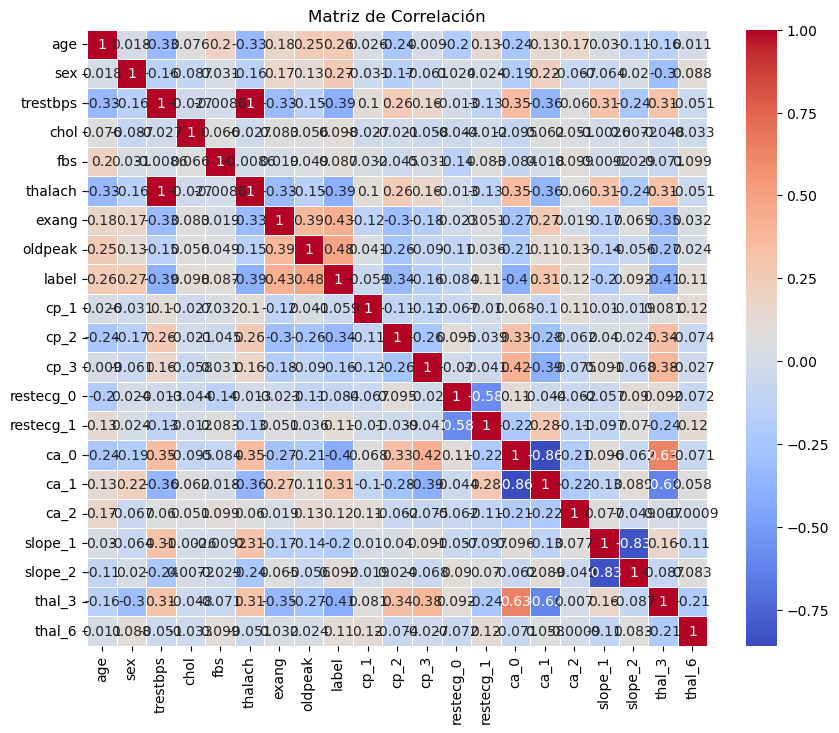

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Calcular la matriz de correlación
correlation_matrix = df_dummy.corr()

# Definir el umbral de correlación
threshold = 0

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, 
            mask=np.abs(correlation_matrix) <= threshold)  # Solo muestra las celdas con correlación mayor que el umbral
plt.title('Matriz de Correlación')

# Mostrar el mapa de calor
plt.show()

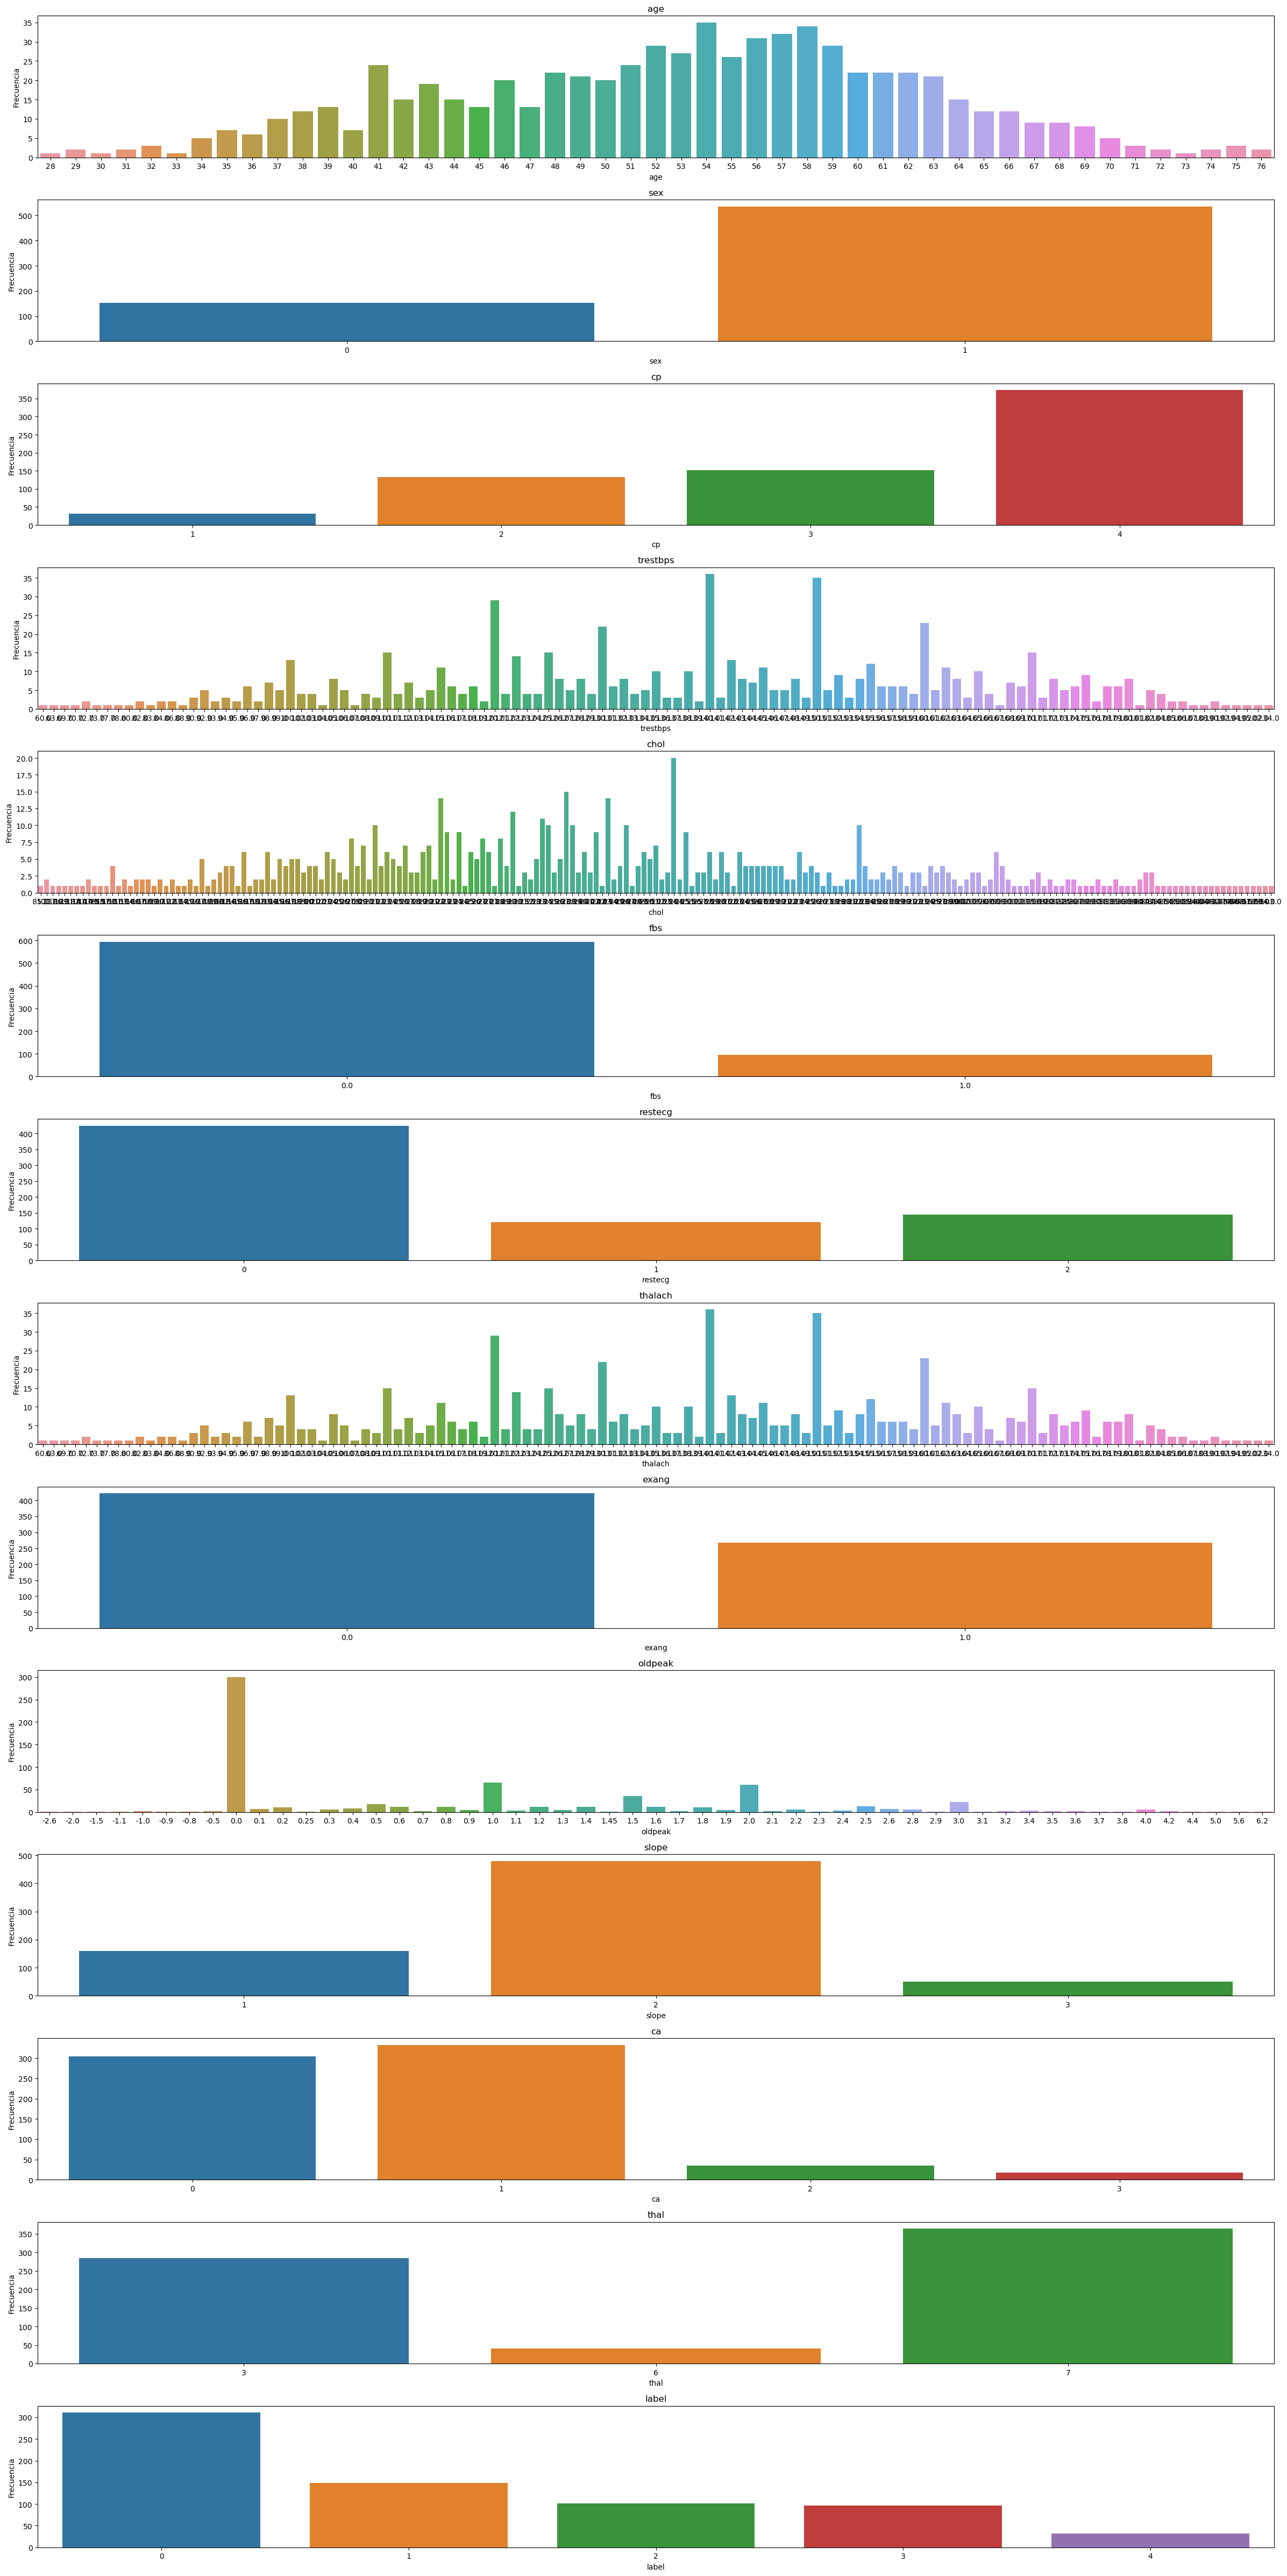

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

# Subgráficos
num_cols = 1
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=train_copy_knn, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### B- Transformaciones dataset TEST

#### Definicion de datatypes

In [37]:
test = pd.read_csv("test.csv")

In [38]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,4.0,156,173,0,2,119,1,3,3,?,?
1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,-9.0,-9.0,-9.0
2,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0
3,62.0,1.0,4.0,115,0,?,0,128,1,2.5,3,?,?
4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0
180,55.0,1.0,2.0,110,214,1,1,180,0,?,?,?,?
181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0
182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0


In [39]:
import numpy as np

# Reemplazar '?' con NaN 
test = test.replace('?', np.nan)

# Convertir variables discretas a numericas
int_cols = ['age', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
test[int_cols] = test[int_cols].apply(pd.to_numeric, errors='coerce')

# Convertir variables a continuas a numericas
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
test[float_cols] = test[float_cols].apply(pd.to_numeric, errors='coerce')


# Iterar sobre las columnas numéricas y reemplazar los valores negativos por NaN, y -9 por NaN solo en 'oldpeak'
for col in int_cols + float_cols:
    if col == 'oldpeak':
        test[col] = test[col].replace(-9, np.nan)
    else:
        test[col] = test[col].apply(lambda x: np.nan if pd.isnull(x) or x < 0 else x)

# Cambio los 9 en ca por nan
test['ca'] = test['ca'].replace(9, float('nan'))


# Convertir las columnas discretas a tipo entero
test[int_cols] = test[int_cols].astype('Int64')

# Verificar la información del DataFrame
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156.0,173.0,0,2,119.0,1,3.0,3,<NA>,<NA>
1,52,1,2,160.0,196.0,0,0,165.0,0,0.0,<NA>,<NA>,<NA>
2,48,1,2,100.0,NaN,0,0,100.0,0,0.0,<NA>,<NA>,<NA>
3,62,1,4,115.0,0.0,<NA>,0,128.0,1,2.5,3,<NA>,<NA>
4,51,1,3,110.0,175.0,0,0,123.0,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,200.0,198.0,0,0,142.0,1,2.0,2,<NA>,<NA>
180,55,1,2,110.0,214.0,1,1,180.0,0,NaN,<NA>,<NA>,<NA>
181,67,1,3,152.0,212.0,0,2,150.0,0,0.8,2,0,7
182,59,1,1,170.0,288.0,0,2,159.0,0,0.2,2,0,7


#### Reemplazo de valores missing

##### Reemplazo de ***valores faltantes*** para cada variable en particular utilizanndo agrupaciones con otras variebles


In [40]:
#Copia del df
test_copy_a =  test.copy()


test_copy_a['chol'].replace(0, np.nan, inplace=True)

# Step 5: Calculate the average 'chol' for each combination of age and gender
average_chol = test_copy_a.groupby(['age', 'sex'])['chol'].mean()


# Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_chol(row):
    if pd.isnull(row['chol']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_chol:
            return average_chol[(age, sex)]
    return row['chol']

test_copy_a['chol'] = test_copy_a.apply(fill_missing_chol, axis=1)


#---------------------------

test_copy_a['thalach'].replace(0, np.nan, inplace=True)
# Step 6: Calculate the average 'chol' for each combination of age and gender
average_thalach = test_copy_a.groupby(['age', 'sex'])['thalach'].median()
# Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_thalach(row):
    if pd.isnull(row['thalach']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_thalach:
            return average_chol[(age, sex)]
    return row['thalach']

test_copy_a['thalach'] = test_copy_a.apply(fill_missing_thalach, axis=1)

#---------------------------


test_copy_a['trestbps'].replace(0, np.nan, inplace=True)
# Step 7: Calculate the average 'chol' for each combination of age and gender
average_trestbps = test_copy_a.groupby(['age', 'sex'])['trestbps'].median()
#Fill in the missing values in the 'chol' column with the corresponding average value based on age and gender
def fill_missing_trestbps(row):
    if pd.isnull(row['trestbps']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_trestbps:
            return average_chol[(age, sex)]
    return row['trestbps']

test_copy_a['trestbps'] = test_copy_a.apply(fill_missing_thalach, axis=1)

#---------------------------


# Step 9: Group by 'cp' and 'restecg' and get the mode of 'exang'
mode_exang_by_cp_restecg = test_copy_a.groupby(['cp', 'restecg'])['exang'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill in missing values in 'exang' based on the mode for the corresponding 'cp' and 'restecg' combination
def fill_missing_exang(row):
    if pd.isnull(row['exang']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_exang_by_cp_restecg:
            return mode_exang_by_cp_restecg[(cp, restecg)]
    return row['exang']

test_copy_a['exang'] = test_copy_a.apply(fill_missing_exang, axis=1)

#---------------------------


# Step 4: Group by 'cp' and 'age' and get the mode of 'fbs'
mode_fbs_by_cp_age = test_copy_a.groupby(['cp','exang'])['fbs'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill in missing values in 'fbs' based on the mode for the corresponding 'cp' and 'age' combination
def fill_missing_fbs(row):
    if pd.isnull(row['fbs']):
        cp = row['cp']
        exang = row['exang']
        if (cp, exang) in mode_fbs_by_cp_age:
            return mode_fbs_by_cp_age[(cp, exang)]
    return row['fbs']


test_copy_a['fbs'] = test_copy_a.apply(fill_missing_fbs, axis=1)


#---------------------------

# Step 8: Calculate the average 'oldpeak' for each combination of age and gender
average_oldpeak = test_copy_a.groupby(['age', 'sex'])['oldpeak'].median()

# Fill in the missing values in the 'oldpeak' column with the corresponding average value based on age and gender
def fill_missing_oldpeak(row):
    if pd.isnull(row['oldpeak']):
        age = row['age']
        sex = row['sex']
        if (age, sex) in average_oldpeak:
            return average_oldpeak[(age, sex)]
    return row['oldpeak']

test_copy_a['oldpeak'] = test_copy_a.apply(fill_missing_oldpeak, axis=1)



#---------------------------

mode_slope_by_cp_restecg = test_copy_a.groupby(['age', 'restecg'])['slope'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)


# Step 3: Fill in missing values in 'slope' based on the mode for the corresponding 'cp' and 'restecg' combination
def fill_missing_slope(row):
    if pd.isnull(row['slope']):
        age = row['age']
        restecg = row['restecg']
        if (age, restecg) in mode_slope_by_cp_restecg:
            return mode_slope_by_cp_restecg[(age, restecg)]
    return row['slope']

test_copy_a['slope'] = test_copy_a.apply(fill_missing_slope, axis=1)

#---------------------------


# Step 1: Calculate the mode 'ca' for each age
mode_ca_by_sex_cp = test_copy_a.groupby(['sex', 'cp'])['ca'].median()

# Step 2: Fill in the missing values in the 'ca' column with the corresponding mode value based on age
def fill_missing_ca(row):
    if pd.isnull(row['ca']):
        sex = row['sex']
        cp = row['cp']
        if (sex, cp) in mode_ca_by_sex_cp:
            return mode_ca_by_sex_cp[(sex, cp)]
    return row['ca']


test_copy_a['ca'] = test_copy_a.apply(fill_missing_ca, axis=1)




#---------------------------

# Step 2: Calculate the mode 'thal' for each age
mode_thal_by_age = test_copy_a.groupby(['cp', 'restecg'])['thal'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

def fill_missing_thal(row):
    if pd.isnull(row['thal']):
        cp = row['cp']
        restecg = row['restecg']
        if (cp, restecg) in mode_thal_by_age_restecg:
            return mode_thal_by_age_restecg[(cp, restecg)]
    return row['thal']

test_copy_a['thal'] = test_copy_a.apply(fill_missing_thal, axis=1)




test_copy_a[int_cols] = test_copy_a[int_cols].astype('Int64')
test_copy_a


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,119.0,173.0,0,2,119.0,1,3.0,3,1,7
1,52,1,2,165.0,196.0,0,0,165.0,0,0.0,2,0,3
2,48,1,2,100.0,238.0,0,0,100.0,0,0.0,2,0,3
3,62,1,4,128.0,237.2,0,0,128.0,1,2.5,3,1,7
4,51,1,3,123.0,175.0,0,0,123.0,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,142.0,198.0,0,0,142.0,1,2.0,2,1,7
180,55,1,2,180.0,214.0,1,1,180.0,0,0.8,1,0,<NA>
181,67,1,3,150.0,212.0,0,2,150.0,0,0.8,2,0,7
182,59,1,1,159.0,288.0,0,2,159.0,0,0.2,2,0,7


##### KNN (K-Nearest Neighbors)

In [41]:
from sklearn.impute import KNNImputer

# Copia del dataframe
test_copy_b = test_copy_a.copy()

# Reemplazar valores cero con NaN
test_copy_b[float_cols] = test_copy_b[float_cols].replace(0, float('nan'))

# Imputar valores faltantes utilizando KNNImputer
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(test_copy_b[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)

# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = test_copy_b[int_cols].fillna(test_copy_b.mode().iloc[0])

# Combinar las variables float y int imputadas
test_copy_b = pd.concat([numeric_imputed_df, categorical_imputed_df], axis=1)

# Verificar si hay valores faltantes después de la imputación
test_copy_b = test_copy_b[test.columns]
test_copy_b


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,119.0,173.0,0,2,119.0,1,3.00,3,1,7
1,52,1,2,165.0,196.0,0,0,165.0,0,1.02,2,0,3
2,48,1,2,100.0,238.0,0,0,100.0,0,1.50,2,0,3
3,62,1,4,128.0,237.2,0,0,128.0,1,2.50,3,1,7
4,51,1,3,123.0,175.0,0,0,123.0,0,0.60,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,142.0,198.0,0,0,142.0,1,2.00,2,1,7
180,55,1,2,180.0,214.0,1,1,180.0,0,0.80,1,0,7
181,67,1,3,150.0,212.0,0,2,150.0,0,0.80,2,0,7
182,59,1,1,159.0,288.0,0,2,159.0,0,0.20,2,0,7


##### Normalizacion binaria de continuas a traves de parametros normales

In [42]:
'''''
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

#Copia del df
test_copy_c = test.copy()

float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
int_cols = ['age', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']

train_float = test_copy_c[float_cols]
trainc_categorical = test_copy_c[int_cols].fillna(test_copy_c.mode().iloc[0])

def imputar_valores_anormales(df, rangos_normales):

    # Inicializar un DataFrame para almacenar los valores imputados
    df_imputado = df.copy()
    
    # Iterar sobre cada columna y su rango normal correspondiente
    for col, rango_normal in rangos_normales.items():
        min_val, max_val = rango_normal
        
        # Imputar los valores dentro o fuera del rango normal
        df_imputado[col] = df[col].apply(lambda x: 0 if min_val <= x <= max_val else 1)
    
    return df_imputado


# Aplicar funcion
train_float_imputado = imputar_valores_anormales(train_float, rangos_normales)



# Combinar las variables float y int imputadas
test_copy_c = pd.concat([trainc_categorical, train_float_imputado], axis=1)

test_copy_c = test_copy_c[test.columns]

test_copy_c
'''''


"''\nfrom sklearn.impute import KNNImputer\nfrom sklearn.preprocessing import OneHotEncoder\n\n#Copia del df\ntest_copy_c = test.copy()\n\nfloat_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']\nint_cols = ['age', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']\n\ntrain_float = test_copy_c[float_cols]\ntrainc_categorical = test_copy_c[int_cols].fillna(test_copy_c.mode().iloc[0])\n\ndef imputar_valores_anormales(df, rangos_normales):\n\n    # Inicializar un DataFrame para almacenar los valores imputados\n    df_imputado = df.copy()\n    \n    # Iterar sobre cada columna y su rango normal correspondiente\n    for col, rango_normal in rangos_normales.items():\n        min_val, max_val = rango_normal\n        \n        # Imputar los valores dentro o fuera del rango normal\n        df_imputado[col] = df[col].apply(lambda x: 0 if min_val <= x <= max_val else 1)\n    \n    return df_imputado\n\n\n# Aplicar funcion\ntrain_float_imputado = imputar_valores_anormales(train_float, 

##### Convirtiendo catecoricas ordinales a dummy

In [43]:
# Convierto variables seleccionadas a dummy 
test_copy_dummy_d = pd.get_dummies(test_copy_b, columns=['cp', 'restecg', 'ca', 'slope', 'thal'], dtype=int)


# Elimino la el valor de referencia (resultado normal) para evitar colinealidad
test_copy_dummy_d.drop('cp_4', axis=1, inplace=True)
test_copy_dummy_d.drop('restecg_2', axis=1, inplace=True)
test_copy_dummy_d.drop('ca_3', axis=1, inplace=True)
test_copy_dummy_d.drop('slope_3', axis=1, inplace=True)
test_copy_dummy_d.drop('thal_7', axis=1, inplace=True)

#Eso es interesante
# test_copy_dummy_d.drop('thalach', axis=1, inplace=True)
#test_copy_dummy_d.drop('trestbps', axis=1, inplace=True)
#test_copy_dummy_d.drop('oldpeak', axis=1, inplace=True)

test_copy_dummy_d

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,cp_3,restecg_0,restecg_1,ca_0,ca_1,ca_2,slope_1,slope_2,thal_3,thal_6
0,57,1,119.0,173.0,0,119.0,1,3.00,0,0,0,0,0,0,1,0,0,0,0,0
1,52,1,165.0,196.0,0,165.0,0,1.02,0,1,0,1,0,1,0,0,0,1,1,0
2,48,1,100.0,238.0,0,100.0,0,1.50,0,1,0,1,0,1,0,0,0,1,1,0
3,62,1,128.0,237.2,0,128.0,1,2.50,0,0,0,1,0,0,1,0,0,0,0,0
4,51,1,123.0,175.0,0,123.0,0,0.60,0,0,1,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,142.0,198.0,0,142.0,1,2.00,0,0,0,1,0,0,1,0,0,1,0,0
180,55,1,180.0,214.0,1,180.0,0,0.80,0,1,0,0,1,1,0,0,1,0,0,0
181,67,1,150.0,212.0,0,150.0,0,0.80,0,0,1,0,0,1,0,0,0,1,0,0
182,59,1,159.0,288.0,0,159.0,0,0.20,1,0,0,0,0,1,0,0,0,1,0,0


## 3 - Entrenamiento del Modelo

### Evaluacion de modelos

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression


# Identificar las filas con valores negativos
#valores_negativos = (train < 0).any(axis=1)

#Eliminar las filas con valores negativos
#train = train[~valores_negativos]

#Seleccion del df para entrenar al modelo
df_train = train_copy_knn
##########################################################################


# Separacion entre Label y las variables independientes
X = df_train.drop('label', axis=1)  # Variables independientes
y = df_train['label']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Entrenar y evaluar cada modelo
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, MSE: {mse}, R2: {r2}")

Model: LinearRegression, MSE: 0.8608896376443675, R2: 0.3673143881719857
Model: Ridge, MSE: 0.861474045607138, R2: 0.36688489466513585
Model: Lasso, MSE: 1.1010079635207928, R2: 0.1908464609543482
Model: DecisionTreeRegressor, MSE: 2.130434782608696, R2: -0.5657006135916334
Model: RandomForestRegressor, MSE: 1.014886956521739, R2: 0.254138571373442


### Entrenamiento de modelo de ***regresion lineal***

In [45]:
'''''
# Paso 1: Seleccionar y entrenar el modelo de regresión
model = LinearRegression()  
model = model.fit(X_train, y_train)

# Paso 2: Evaluar el rendimiento del modelo
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#Metricas de performance
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

valores_reales = y_test

# Paso 3: Graficar
# Calcular la regresión lineal entre los valores reales y las predicciones
model_chart = model
model_chart.fit(valores_reales.to_numpy().reshape(-1, 1), test_predictions)

# Obtener los coeficientes de la regresión lineal
pendiente = model_chart.coef_[0]
intercepto = model_chart.intercept_

# Crear el diagrama de dispersión con la línea de mejor ajuste
plt.figure(figsize=(8, 6))
plt.scatter(valores_reales, test_predictions, color='blue')
plt.plot(valores_reales, pendiente * valores_reales + intercepto, color='red')  # Línea de mejor ajuste
plt.title('Diagrama de Dispersión: Predicción vs. Observación con Línea de Mejor Ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

print("Error cuadrático medio en conjunto de entrenamiento:", train_mse)
print("Error cuadrático medio en conjunto de prueba:", test_mse)
print("R2 train", train_r2)
print("R2 test", test_r2)
'''''


'\'\'\n# Paso 1: Seleccionar y entrenar el modelo de regresión\nmodel = LinearRegression()  \nmodel = model.fit(X_train, y_train)\n\n# Paso 2: Evaluar el rendimiento del modelo\ntrain_predictions = model.predict(X_train)\ntest_predictions = model.predict(X_test)\n\n#Metricas de performance\ntrain_mse = mean_squared_error(y_train, train_predictions)\ntest_mse = mean_squared_error(y_test, test_predictions)\ntrain_r2 = r2_score(y_train, train_predictions)\ntest_r2 = r2_score(y_test, test_predictions)\n\nvalores_reales = y_test\n\n# Paso 3: Graficar\n# Calcular la regresión lineal entre los valores reales y las predicciones\nmodel_chart = model\nmodel_chart.fit(valores_reales.to_numpy().reshape(-1, 1), test_predictions)\n\n# Obtener los coeficientes de la regresión lineal\npendiente = model_chart.coef_[0]\nintercepto = model_chart.intercept_\n\n# Crear el diagrama de dispersión con la línea de mejor ajuste\nplt.figure(figsize=(8, 6))\nplt.scatter(valores_reales, test_predictions, color=\'b

### Entrenamiento con ***logistic regression***

In [46]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        689 non-null    Int64  
 1   sex        689 non-null    Int64  
 2   trestbps   689 non-null    float64
 3   chol       689 non-null    float64
 4   fbs        689 non-null    float64
 5   thalach    689 non-null    float64
 6   exang      689 non-null    float64
 7   oldpeak    689 non-null    float64
 8   label      689 non-null    Int64  
 9   cp_1       689 non-null    int32  
 10  cp_2       689 non-null    int32  
 11  cp_3       689 non-null    int32  
 12  restecg_0  689 non-null    int32  
 13  restecg_1  689 non-null    int32  
 14  ca_0       689 non-null    int32  
 15  ca_1       689 non-null    int32  
 16  ca_2       689 non-null    int32  
 17  slope_1    689 non-null    int32  
 18  slope_2    689 non-null    int32  
 19  thal_3     689 non-null    int32  
 20  thal_6    

#### **Seleccion** de variables con mejor ajuste


**Backward elimination** es una técnica de selección de características que iterativamente realiza entrenamientos del modelo con todas las combinaciones posibles de variables, seleccionando la combinacion con mayor performance, maximizando así su rendimiento.

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import numpy as np

df_train_select = df_dummy.copy()

def backward_elimination(X, y, model):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Escalar características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Inicializar el mejor conjunto de características y su precisión inicialmente
    best_features = X.columns.tolist()
    best_accuracy = 0.0
    
    # Iterar sobre todas las combinaciones de características y realizar backward elimination
    n_features = len(best_features)
    for k in range(n_features, 0, -1):
        for feature_comb in combinations(best_features, k):
            # Entrenar el modelo con las características seleccionadas
            accuracy = np.mean(cross_val_score(model, X_train_scaled[:, [X.columns.get_loc(col) for col in feature_comb]], y_train, cv=5))
            
            # Guardar el mejor conjunto de características y su precisión
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = list(feature_comb)
        
    return best_features, best_accuracy


# Separación entre Label y las variables independientes
X = df_train_select.drop('label', axis=1)  # Variables independientes
y = df_train_select['label']  # Variable dependiente

# Inicializar el modelo de regresión lineal
model = LogisticRegression()

# Ejecutar backward elimination
selected_features, best_accuracy = backward_elimination(X, y, model)

# Imprimir el mejor conjunto de características y su precisión
print("Mejor conjunto de características:", selected_features)
print("Precisión media del modelo con el mejor conjunto de características:", best_accuracy)


KeyboardInterrupt: 

#### **Entrenamiento** con bucle de 1k iteraciones

El código ajusta un modelo de regresión logística a datos escalados usando un pipeline. Luego, itera 1000 veces, dividiendo los datos, ajustando el modelo y evaluando su precisión. Finalmente, visualiza y calcula la precisión media del modelo.

In [ ]:
#selected_features = ['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'cp_1', 'cp_2', 'cp_3', 'ca_0', 'ca_1', 'ca_2', 'slope_1', 'slope_2', 'thal_3', 'thal_6']
#selected_features = ['age','fbs','thalach', 'exang', 'oldpeak', 'cp_1', 'cp_2', 'cp_3', 'slope_1', 'slope_2', 'thal_3', 'thal_6']

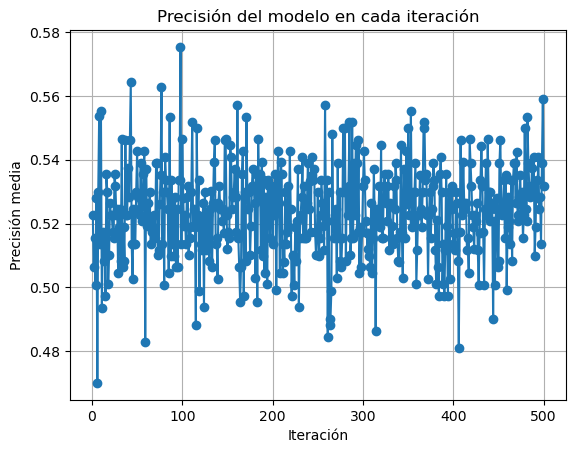

Precisión media del modelo después de todas las iteraciones: 0.5235520393120394


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

df_train = df_dummy.copy()
# Separación entre Label y las variables independientes
X = df_train[selected_features]  # Variables independientes
y = df_train['label']  # Variable dependiente

# Escalar características y ajustar el modelo de regresión logística en un pipeline
scaler = StandardScaler()
model_lr = LogisticRegression(max_iter=1000)

# Pipeline: Escalado de características y modelo de regresión logística
pipeline = make_pipeline(scaler, model_lr)

# Inicializar el vector para almacenar los indicadores del modelo en cada iteración
model_scores = []

# Iterar sobre 1000 iteraciones
for i in range(500):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Ajustar el modelo con los datos de entrenamiento
    pipeline.fit(X_train, y_train)

    # Calcular la precisión del modelo usando validación cruzada k-fold
    accuracy = np.mean(cross_val_score(pipeline, X_train, y_train, cv=5))
    model_scores.append(accuracy)

# Visualización de la precisión del modelo en cada iteración
plt.plot(range(1, 501), model_scores, marker='o', linestyle='-')
plt.xlabel('Iteración')
plt.ylabel('Precisión media')
plt.title('Precisión del modelo en cada iteración')
plt.grid(True)
plt.show()

# Calcular la precisión media del modelo después de todas las iteraciones
mean_accuracy = np.mean(model_scores)
print("Precisión media del modelo después de todas las iteraciones:", mean_accuracy)


#### **Evaluacion** del modelo 

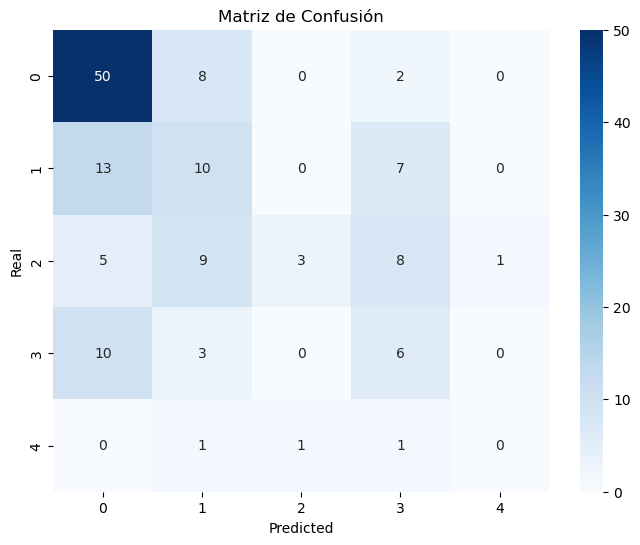

 F1 Score: 0.4624395074255875
Reporte de Clasificación Regresion Logistica TRAIN:
              precision    recall  f1-score   support

         0.0       0.64      0.83      0.72        60
         1.0       0.32      0.33      0.33        30
         2.0       0.75      0.12      0.20        26
         3.0       0.25      0.32      0.28        19
         4.0       0.00      0.00      0.00         3

    accuracy                           0.50       138
   macro avg       0.39      0.32      0.31       138
weighted avg       0.52      0.50      0.46       138

Precision TEST Clasificación:
0.5


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score



#Seleccion del df para entrenar al modelo
#df_train = df_dummy
##########################################################################


# Separacion entre Label y las variables independientes
#X = df_train.drop('label', axis=1)  # Variables independientes
#y = df_train['label']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
#scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar el modelo de regresión logística multiclase
#model = LogisticRegression(max_iter=1000)
#model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model_lr.predict(X_test_scaled)


# Evaluar el modelo
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.show()

# Mostrar el reporte de clasificación

f1_rf = f1_score(y_test, y_pred, average='weighted')
print(" F1 Score:", f1_rf)


print("Reporte de Clasificación Regresion Logistica TRAIN:")
print(classification_report(y_test, y_pred))

print("Precision TEST Clasificación:")
print(test_accuracy)




#### Entrenamiento con ADA BOOST y Random Forest

In [ ]:
'''''
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer

df_train = train_copy_knn.copy()

# Separación entre Label y las variables independientes
X = df_train.drop('label', axis=1)  # Variables independientes
y = df_train['label']  # Variable dependiente

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom scoring function for F1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# Define a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define parameter grid for Random Forest
rf_param_grid = {
    'rf__n_estimators': [100, 150, 200, 250, 300],
    'rf__max_depth': [None, 5, 10, 15, 20],
    'rf__min_samples_split': [2, 4, 6, 8, 10],
    'rf__min_samples_leaf': [1, 2, 3, 4, 5],
    'rf__max_features': ['sqrt', 'log2', None, 0.5, 0.8]
}

# Define a pipeline for AdaBoost
ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(random_state=42))
])

# Define parameter grid for AdaBoost
ada_param_grid = {
    'ada__n_estimators': [50, 100, 150, 200, 250],
    'ada__learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, scoring=f1_scorer, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for AdaBoost
ada_grid_search = GridSearchCV(ada_pipeline, ada_param_grid, scoring=f1_scorer, cv=5, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

# Print best parameters and F1-scores
print("Random Forest - Best Parameters:", rf_grid_search.best_params_)
print("Random Forest - Best F1-score:", rf_grid_search.best_score_)
print("Random Forest - Testing F1-score:", f1_score(y_test, rf_grid_search.predict(X_test), average='weighted'))

print("AdaBoost - Best Parameters:", ada_grid_search.best_params_)
print("AdaBoost - Best F1-score:", ada_grid_search.best_score_)
print("AdaBoost - Testing F1-score:", f1_score(y_test, ada_grid_search.predict(X_test), average='weighted'))
'''''

'\'\'\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.metrics import f1_score, make_scorer\n\ndf_train = train_copy_knn.copy()\n\n# Separación entre Label y las variables independientes\nX = df_train.drop(\'label\', axis=1)  # Variables independientes\ny = df_train[\'label\']  # Variable dependiente\n\n# Split the data into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Define a custom scoring function for F1-score\nf1_scorer = make_scorer(f1_score, average=\'weighted\')\n\n# Define a pipeline for Random Forest\nrf_pipeline = Pipeline([\n    (\'scaler\', StandardScaler()),\n    (\'rf\', RandomForestClassifier(random_state=42))\n])\n\n# Define parameter grid for Random Forest\nrf_param_grid = {\n    \'rf__n_estimators\': [100,

In [ ]:
'''''
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom scoring function for F1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# Define pipelines and parameter grids for each classifier
classifiers = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2']
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=42), {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.5, 1.0]
    }),
    'SVM': (SVC(random_state=42), {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }),
    'Logistic Regression': (LogisticRegression(random_state=42), {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    })
}

# Perform GridSearchCV for each classifier
for name, (classifier, param_grid) in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, scoring=f1_scorer, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print best parameters and F1-scores
    print(f"{name} - Best Parameters:", grid_search.best_params_)
    print(f"{name} - Best F1-score:", grid_search.best_score_)
    print(f"{name} - Testing F1-score:", f1_score(y_test, grid_search.predict(X_test), average='weighted'))
    print()
    
    '''''

'\'\'\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier\nfrom sklearn.metrics import f1_score, make_scorer\nfrom sklearn.svm import SVC\nfrom sklearn.linear_model import LogisticRegression\n\n\n# Split the data into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Define a custom scoring function for F1-score\nf1_scorer = make_scorer(f1_score, average=\'weighted\')\n\n# Define pipelines and parameter grids for each classifier\nclassifiers = {\n    \'Random Forest\': (RandomForestClassifier(random_state=42), {\n        \'classifier__n_estimators\': [100, 200, 300],\n        \'classifier__max_depth\': [None, 10, 20],\n        \'classifier__min_samples_split\': [2, 5, 10],\n        \'classifier__min_samples_leaf\': [1, 2, 4],\n        \'classifie

In [ ]:
'''''
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom scoring function for F1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# Define a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define parameter grid for Random Forest
rf_param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2']
}

# Define a pipeline for AdaBoost
ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostClassifier(random_state=42))
])

# Define parameter grid for AdaBoost
ada_param_grid = {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.1, 0.5, 1.0]
}

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, scoring=f1_scorer, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Perform GridSearchCV for AdaBoost
ada_grid_search = GridSearchCV(ada_pipeline, ada_param_grid, scoring=f1_scorer, cv=5, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

# Print best parameters and F1-scores
print("Random Forest - Best Parameters:", rf_grid_search.best_params_)
print("Random Forest - Best F1-score:", rf_grid_search.best_score_)
print("Random Forest - Testing F1-score:", f1_score(y_test, rf_grid_search.predict(X_test), average='weighted'))

print("AdaBoost - Best Parameters:", ada_grid_search.best_params_)
print("AdaBoost - Best F1-score:", ada_grid_search.best_score_)
print("AdaBoost - Testing F1-score:", f1_score(y_test, ada_grid_search.predict(X_test), average='weighted'))

'''''

'\'\'\n# Split the data into train and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Define a custom scoring function for F1-score\nf1_scorer = make_scorer(f1_score, average=\'weighted\')\n\n# Define a pipeline for Random Forest\nrf_pipeline = Pipeline([\n    (\'scaler\', StandardScaler()),\n    (\'rf\', RandomForestClassifier(random_state=42))\n])\n\n# Define parameter grid for Random Forest\nrf_param_grid = {\n    \'rf__n_estimators\': [100, 200, 300],\n    \'rf__max_depth\': [None, 10, 20],\n    \'rf__min_samples_split\': [2, 5, 10],\n    \'rf__min_samples_leaf\': [1, 2, 4],\n    \'rf__max_features\': [\'sqrt\', \'log2\']\n}\n\n# Define a pipeline for AdaBoost\nada_pipeline = Pipeline([\n    (\'scaler\', StandardScaler()),\n    (\'ada\', AdaBoostClassifier(random_state=42))\n])\n\n# Define parameter grid for AdaBoost\nada_param_grid = {\n    \'ada__n_estimators\': [50, 100, 200],\n    \'ada__learning_rate\': [0.1, 0.5, 1.0]

In [ ]:
'''''
# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=5, scoring=f1_scorer)
print("Random Forest - Cross-Validation F1 Scores:", rf_cv_scores)
print("Random Forest - Mean Cross-Validation F1 Score:", rf_cv_scores.mean())

# Perform cross-validation for AdaBoost
ada_cv_scores = cross_val_score(ada_grid_search.best_estimator_, X_train, y_train, cv=5, scoring=f1_scorer)
print("AdaBoost - Cross-Validation F1 Scores:", ada_cv_scores)
print("AdaBoost - Mean Cross-Validation F1 Score:", ada_cv_scores.mean())
'''''

'\'\'\n# Perform cross-validation for Random Forest\nrf_cv_scores = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=5, scoring=f1_scorer)\nprint("Random Forest - Cross-Validation F1 Scores:", rf_cv_scores)\nprint("Random Forest - Mean Cross-Validation F1 Score:", rf_cv_scores.mean())\n\n# Perform cross-validation for AdaBoost\nada_cv_scores = cross_val_score(ada_grid_search.best_estimator_, X_train, y_train, cv=5, scoring=f1_scorer)\nprint("AdaBoost - Cross-Validation F1 Scores:", ada_cv_scores)\nprint("AdaBoost - Mean Cross-Validation F1 Score:", ada_cv_scores.mean())\n'

In [ ]:
'''''
# Evaluate on test set
y_pred = ada_grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve and AUC score (for binary classification)
if len(train['label'].unique()) == 2:
    y_prob = ada_grid_search.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# Feature Importance (if applicable)
if hasattr(ada_grid_search.best_estimator_, 'feature_importances_'):
    feature_importances = ada_grid_search.best_estimator_.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]
    features = X.columns
    top_n = 10
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances[sorted_idx][:top_n], y=features[sorted_idx][:top_n])
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Top 10 Feature Importances")
    plt.show()
'''''

'\'\'\n# Evaluate on test set\ny_pred = ada_grid_search.predict(X_test)\nprint("Classification Report:")\nprint(classification_report(y_test, y_pred))\n\n# Confusion matrix\nconf_matrix = confusion_matrix(y_test, y_pred)\nplt.figure(figsize=(8, 6))\nsns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")\nplt.xlabel("Predicted labels")\nplt.ylabel("True labels")\nplt.title("Confusion Matrix")\nplt.show()\n\n# ROC Curve and AUC score (for binary classification)\nif len(train[\'label\'].unique()) == 2:\n    y_prob = ada_grid_search.predict_proba(X_test)[:, 1]  # Probability of positive class\n    fpr, tpr, thresholds = roc_curve(y_test, y_prob)\n    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")\n    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")\n    plt.xlabel("False Positive Rate")\n    plt.ylabel("True Positive Rate")\n    plt.title("ROC Curve")\n    plt.legend()\n    plt.show()\n\n# Feature Importance (if applicable)\nif hasattr(ada_gr

## 4 - ***Aplicación del Modelo***


In [ ]:
import pandas as pd

# Copia del df TEST
test_model = test_copy_dummy_d[selected_features].copy()

scaler = StandardScaler()
a = scaler.fit_transform(test_model)

# Agregar columna 'label' con las predicciones de LR
test_model['label'] = model_lr.predict(a)


# Agregar columna 'label' con las predicciones de ADA BOOST
#test_model['label'] = ada_grid_search.predict(test_model)


# Calcular la frecuencia de los valores de la variable 'label' usando groupby
label_freq = test_model.groupby('label').size()

print(label_freq)

# Guardar el DataFrame modificado si es necesario
test_model_csv = test_model

# Mostrar el DataFrame modificado
test_model


label
0.0    115
1.0     35
2.0      4
3.0     30
dtype: int64


,trestbps,fbs,oldpeak,cp_1,restecg_1,ca_0,thal_6,label
0,119.0,0,3.00,0,0,0,0,3.0
1,165.0,0,1.02,0,0,1,0,0.0
2,100.0,0,1.50,0,0,1,0,0.0
3,128.0,0,2.50,0,0,0,0,3.0
4,123.0,0,0.60,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...
179,142.0,0,2.00,0,0,0,0,1.0
180,180.0,1,0.80,0,1,1,0,0.0
181,150.0,0,0.80,0,0,1,0,0.0
182,159.0,0,0.20,1,0,1,0,0.0


### Aplicación de predicciones y **creacion de archivo *csv***

In [ ]:
# Creacion de ID
test_model_csv= test_model_csv['label'].reset_index()

# Renombrar la columna 'index' a 'ID'
test_model_csv['ID'] = test_model_csv.index
test_model_csv = test_model_csv[['ID', 'label']].astype(int)

# Guardar el DataFrame en un archivo CSV
test_model_csv.to_csv('sample_submission.csv', index=False)
test_model_csv

,ID,label
0,0,3
1,1,0
2,2,0
3,3,3
4,4,0
...,...,...
179,179,1
180,180,0
181,181,0
182,182,0
